In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import re

In [11]:
df = pd.read_csv(r"C:\Users\91879\Downloads\2022_forbes_billionaires.csv")

In [19]:
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118,91,United States,Berkshire Hathaway,Finance & Investments


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [31]:
df['networth'].replace(to_replace = '$',value='',inplace=True)

In [27]:
df['networth'].replace(to_replace = 'B',value='',inplace=True)

In [34]:
df['networth']=df['networth'].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2600 non-null   int64  
 1   rank        2600 non-null   int64  
 2   name        2600 non-null   object 
 3   networth    2600 non-null   float64
 4   age         2600 non-null   int64  
 5   country     2600 non-null   object 
 6   source      2600 non-null   object 
 7   industry    2600 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 162.6+ KB


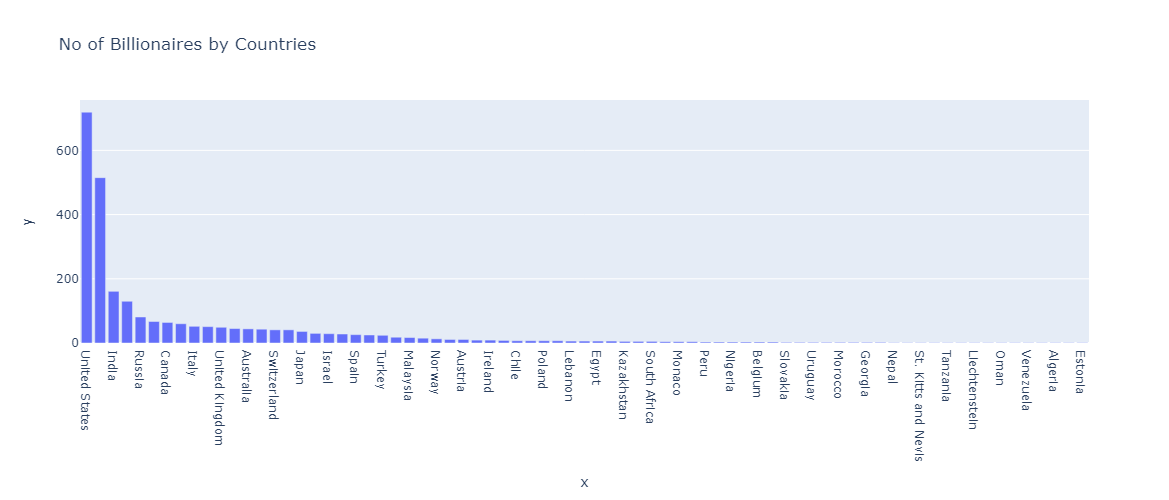

In [119]:
databb = df['country'].value_counts()
xbb = databb.index
ybb = databb.values
fig = px.bar(df,x=xbb,y=ybb,title='No of Billionaires by Countries',
            height=500)
fig.show()

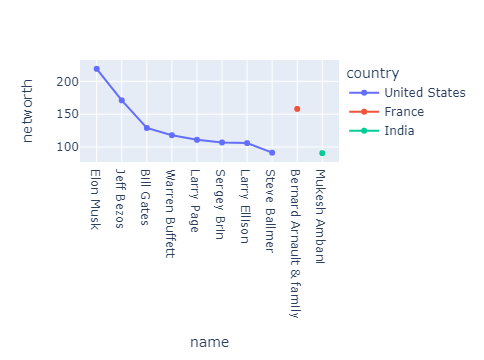

In [130]:
fig = px.line(df.head(10), x="name", y="networth", color="country",
             hover_data=['age'],markers=True)
fig.show()

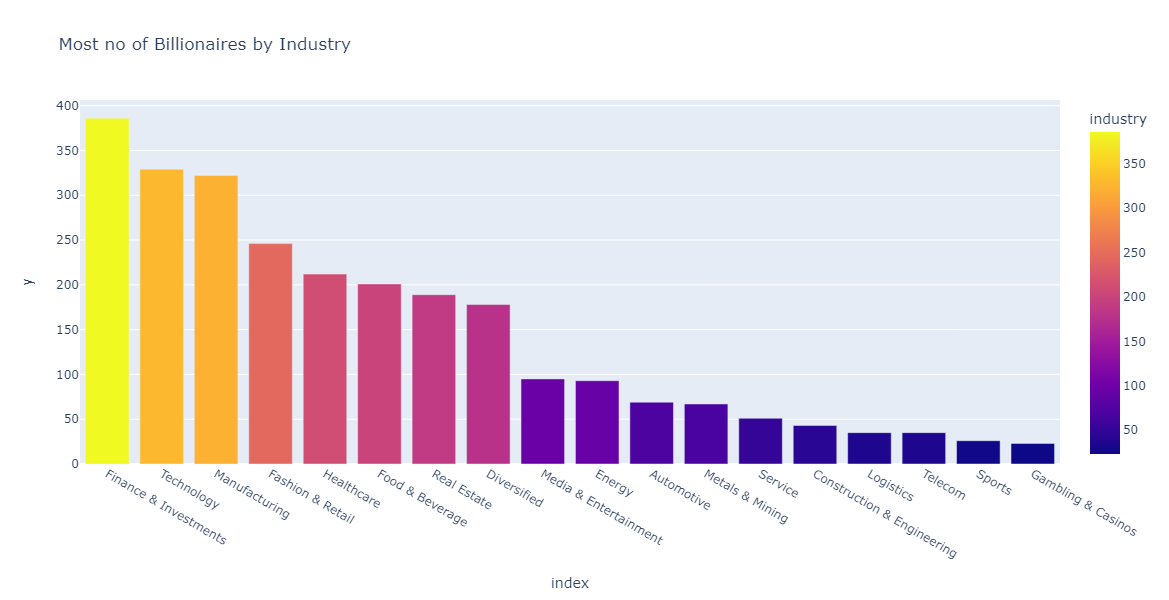

In [121]:
datafb = df['industry'].value_counts()
xfb = datafb.index
yfb = datafb.values
fig = px.bar(datafb,x=xfb,y=yfb,title='Most no of Billionaires by Industry',height=600,color='industry')
fig.update_layout
fig.show()

In [124]:
def barLabel(x,y):
    for i in range(len(x)):
        text = str(y[i]) + ' Billion'
        position = y[i]+(y[i]*0.1)
        plt.text(i, position, text, ha = 'center') 

def createBar(text):
    data = df[['name','networth']].loc[df['industry'] == text].head().copy()
    data = data.reset_index(drop = True)
    plt.figure(figsize = (8,5))
    plt.bar(x = data['name'], height = data['networth'], color = 'orange')
    title = 'Top 5 Rich People From '
    title = title + text
    title = title + 'industry'
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.ylim(0,(data['networth'][0])+(data['networth'][0]*0.25))
    barLabel(data['name'],data['networth'])
    plt.show()    

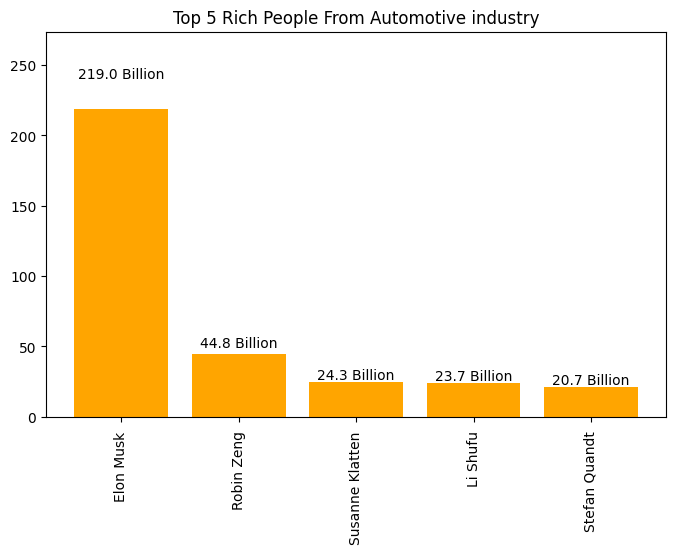

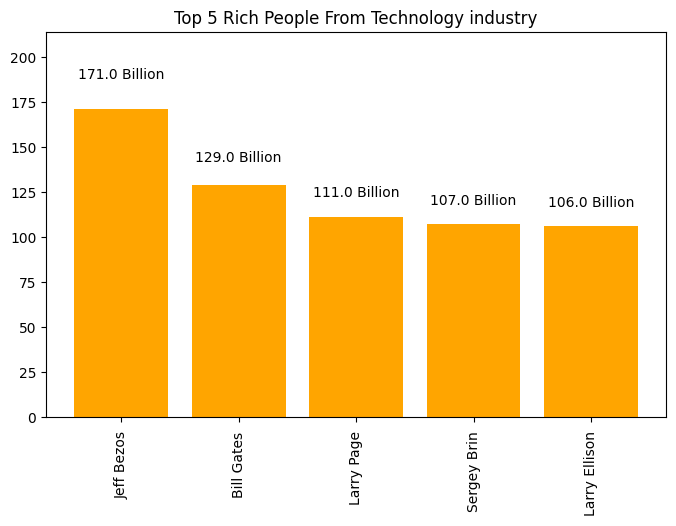

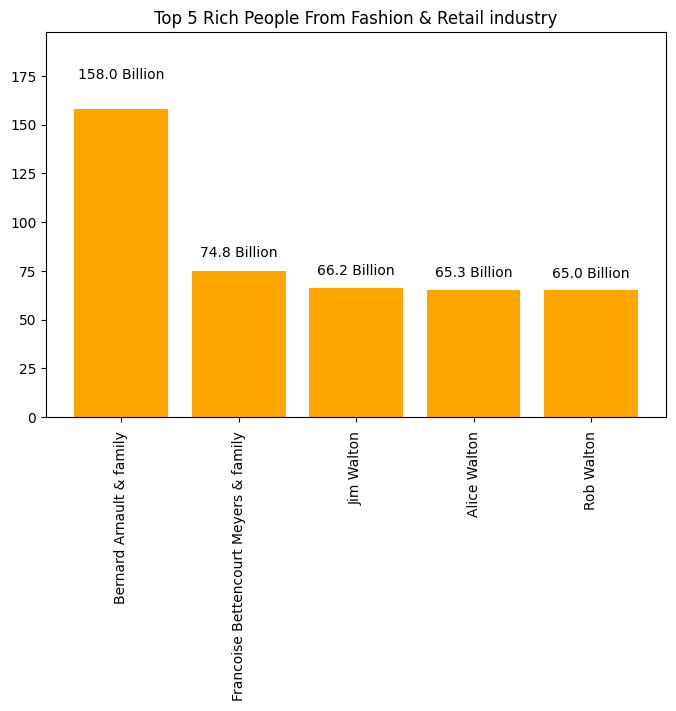

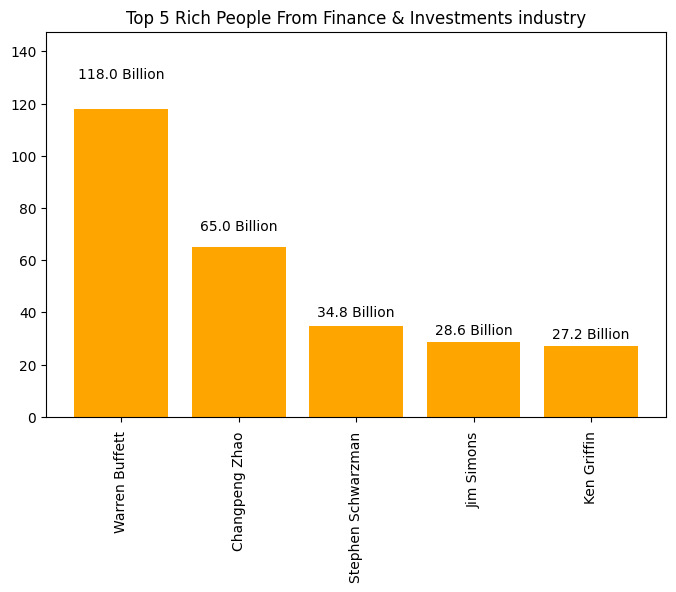

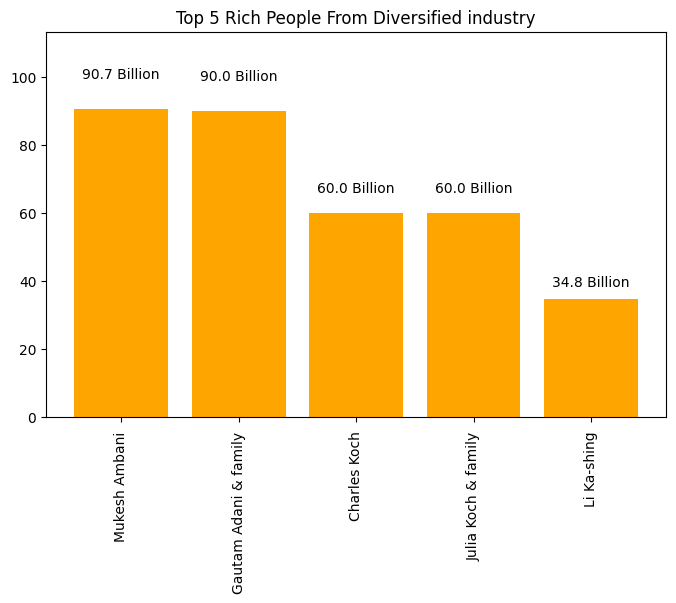

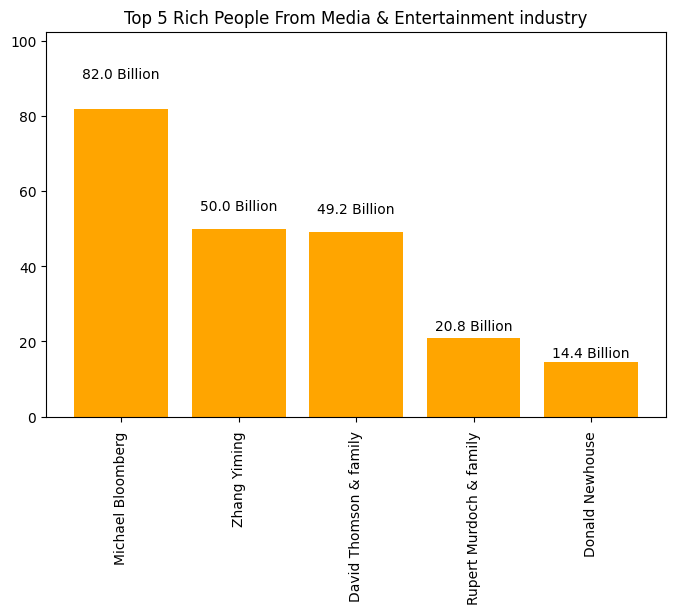

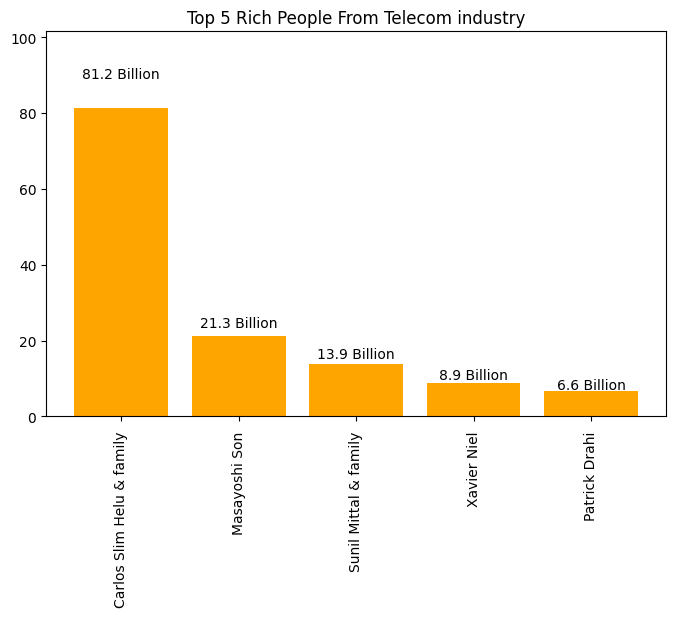

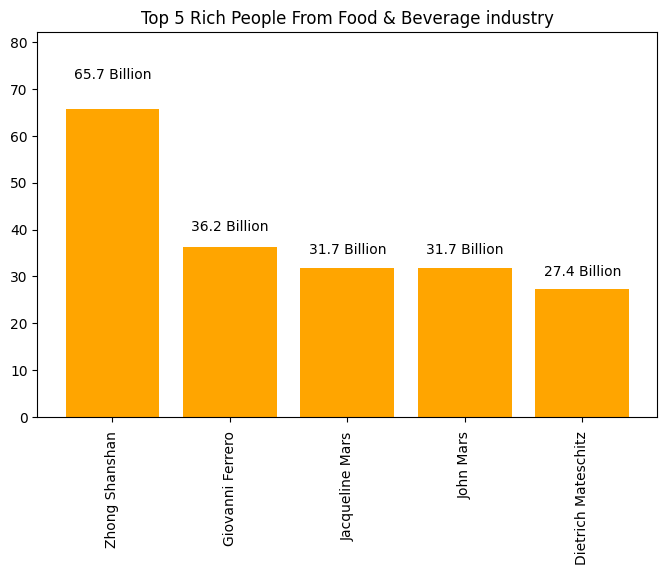

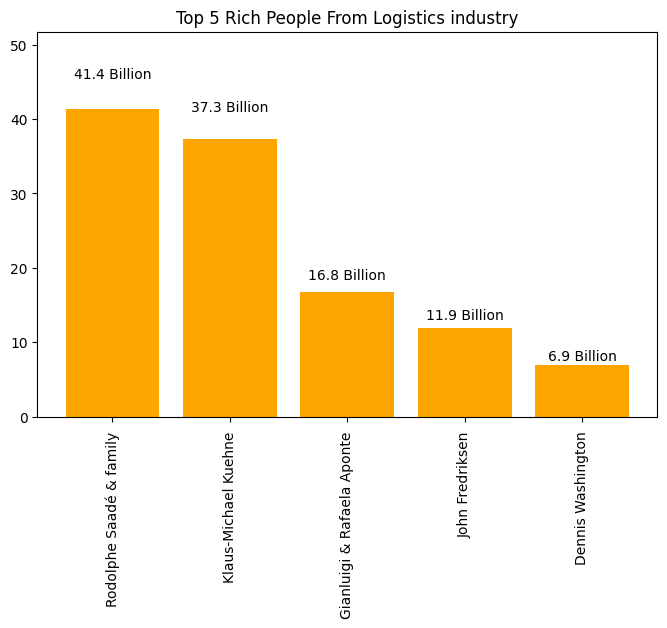

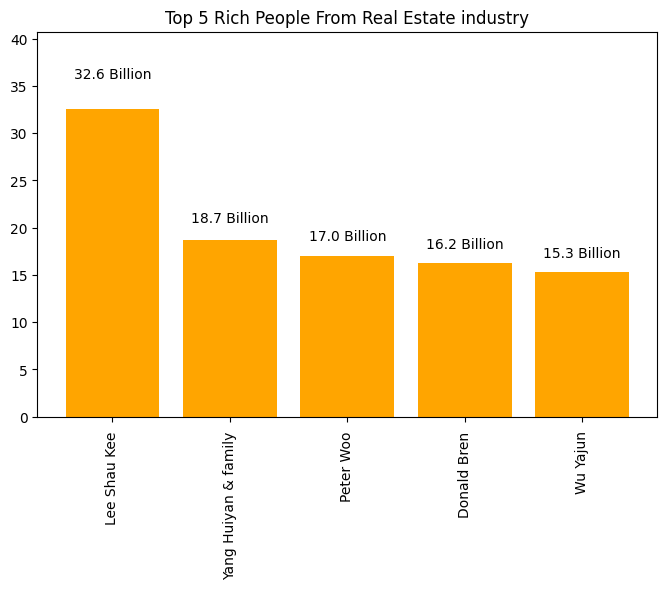

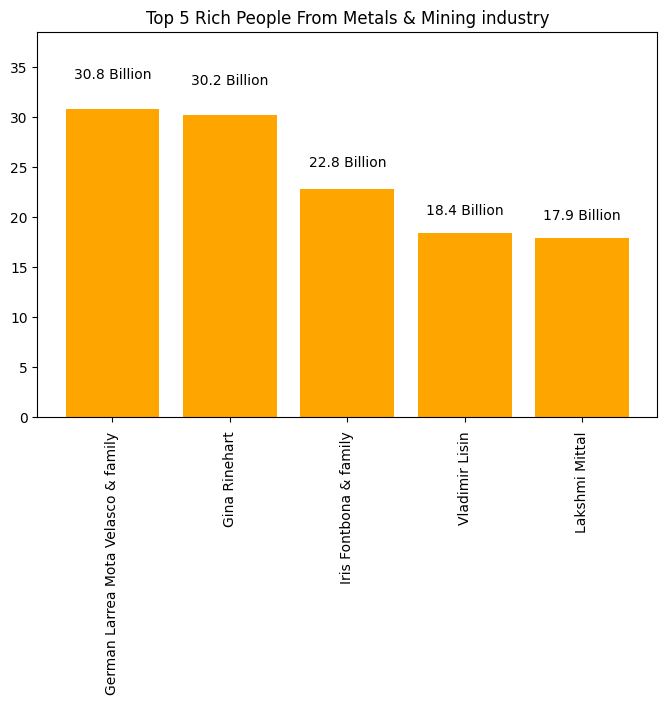

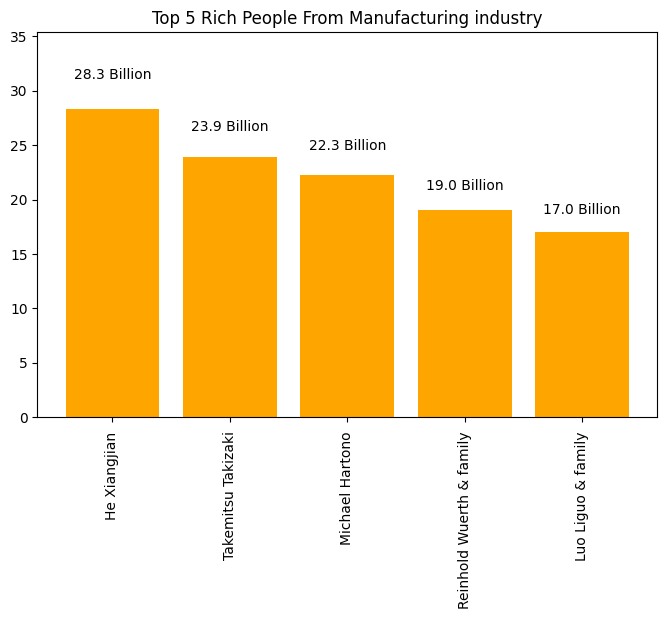

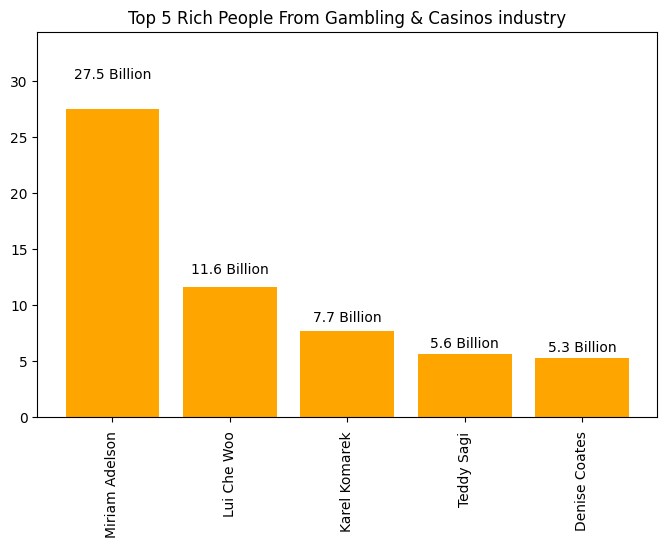

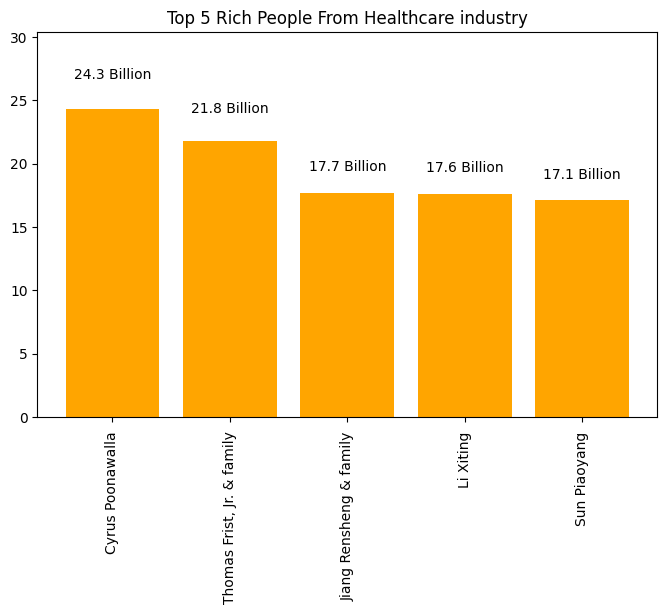

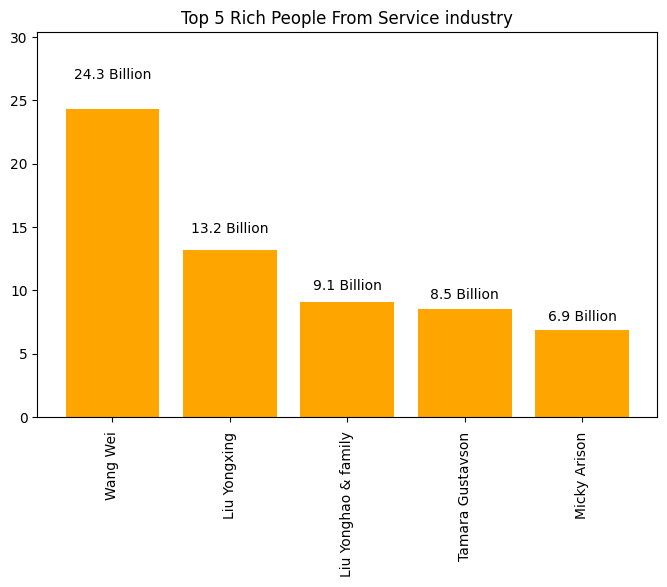

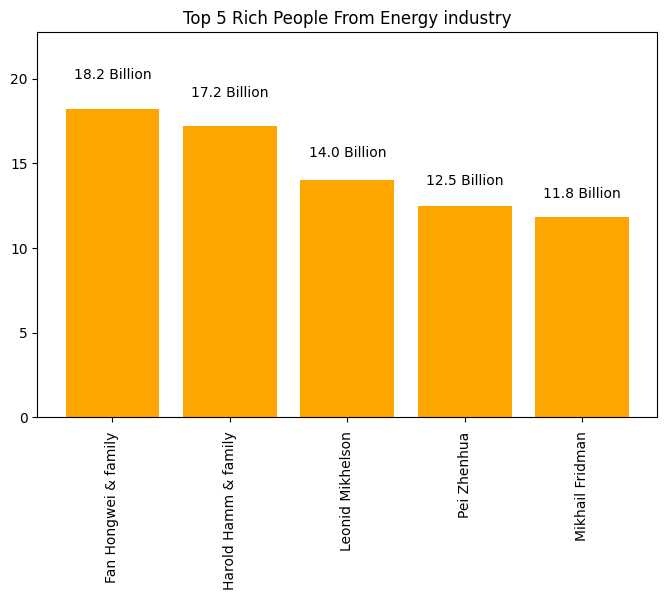

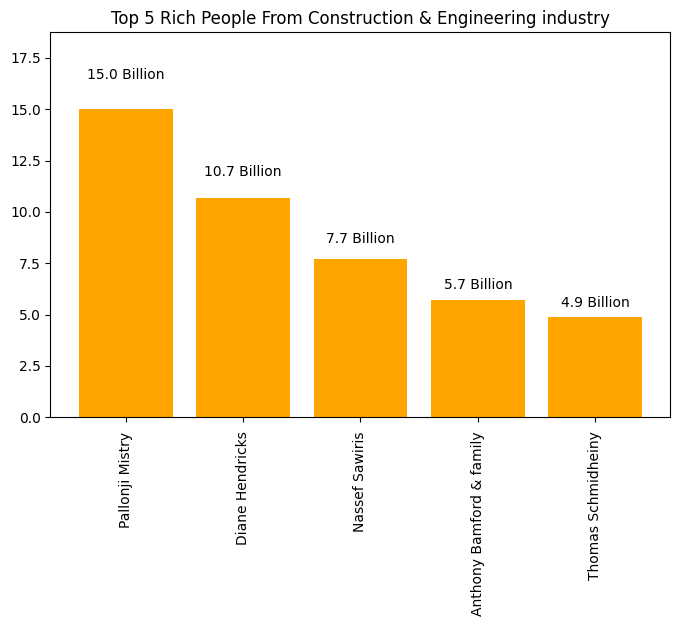

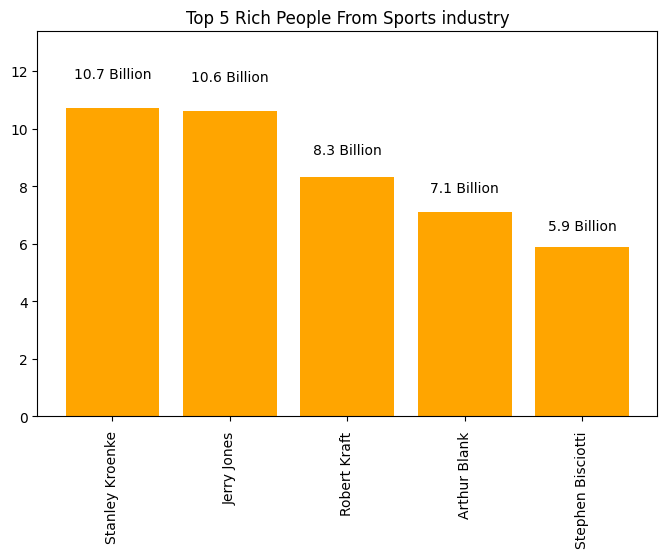

In [125]:
for i in range(len(df['industry'].unique())):
    text = df['industry'].unique()[i]
    createBar(text)


In [80]:
def createBar(text):
    data = df[['name','networth']].loc[df['country'] == text].head().copy()
    data = data.reset_index(drop = True)
    plt.figure(figsize = (8,5))
    plt.bar(x = data['name'], height = data['networth'], color = 'red')
    title = 'Top 5 Rich People From '
    title = title + text
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.ylim(0,(data['networth'][0])+(data['networth'][0]*0.25))
    barLabel(data['name'],data['networth'])
    plt.show()    

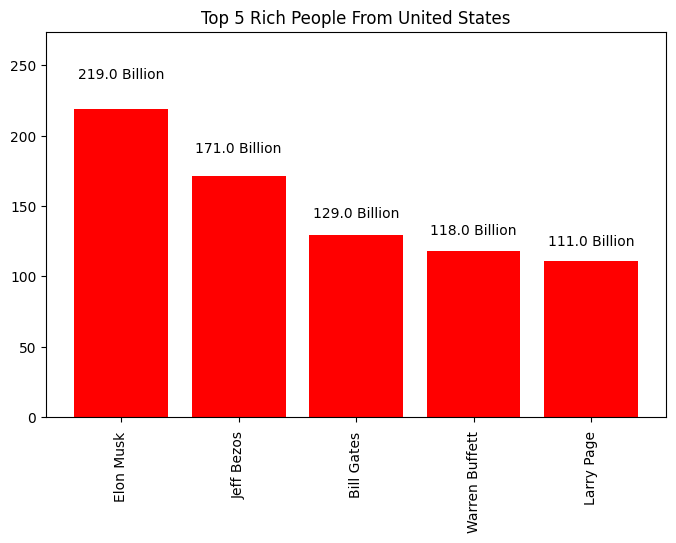

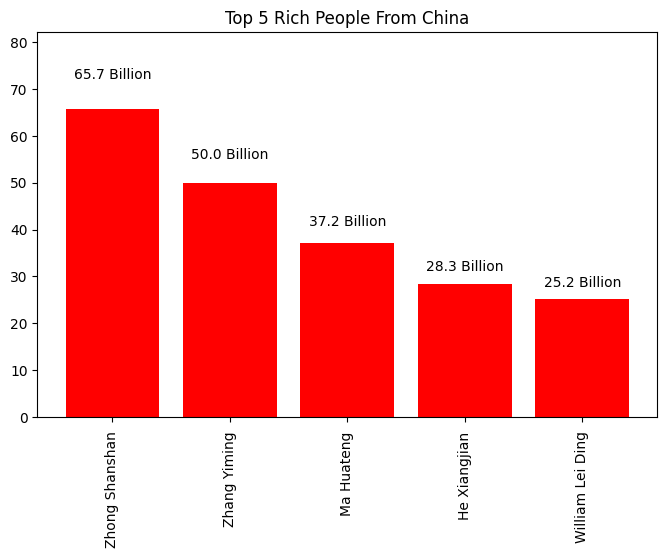

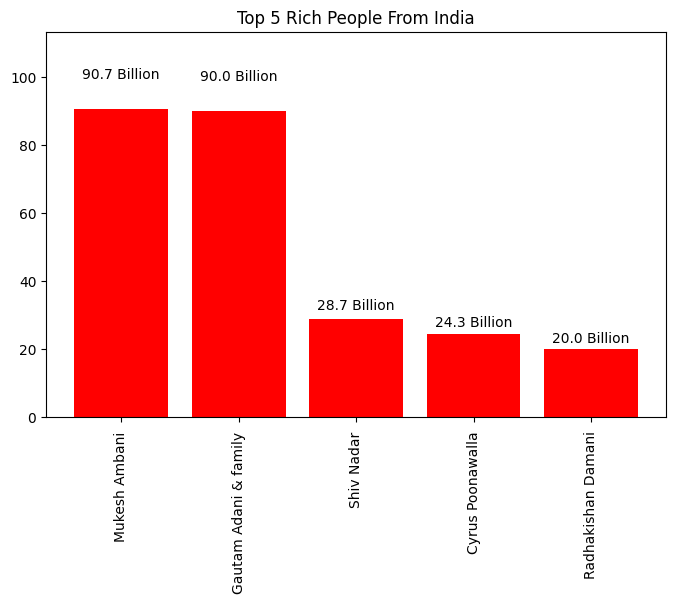

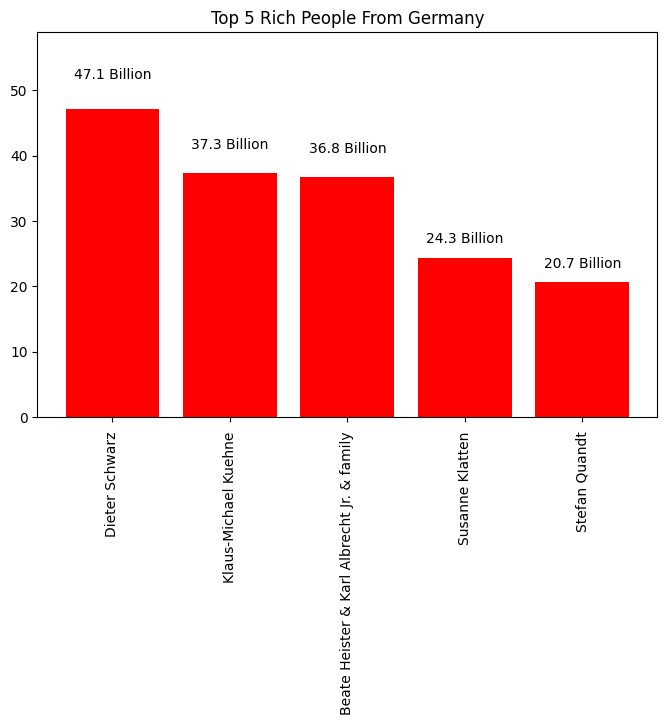

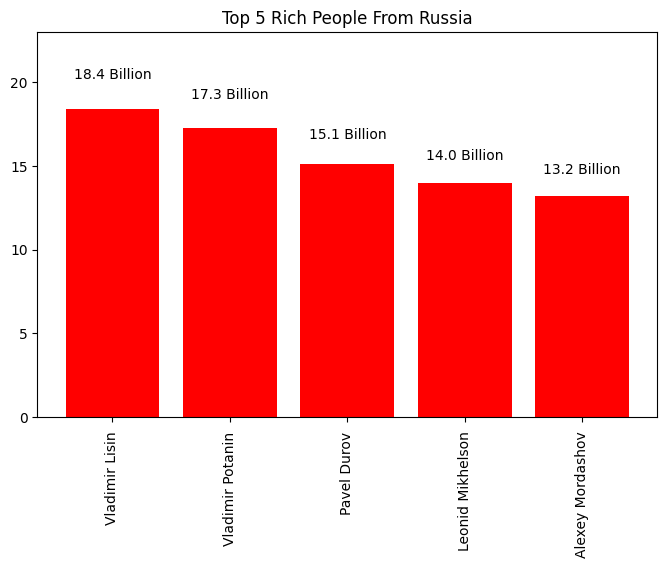

In [81]:
country = df['country'].value_counts().head().index
for i in range(len(country)):
        createBar(country[i])

In [82]:
df_age = df.sort_values(by='age',ascending=False)

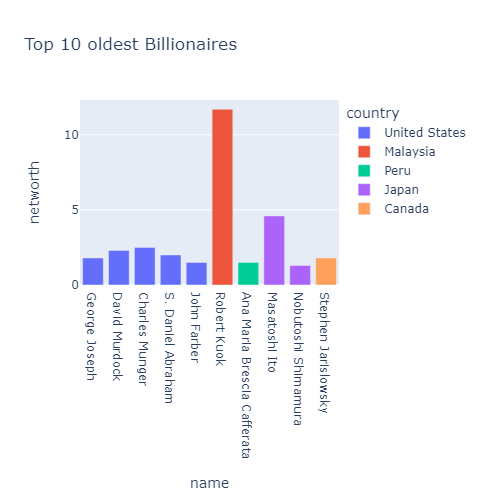

In [108]:
fig = px.bar(df_age.head(10),x='name',y='networth',title='Top 10 oldest Billionaires',
             height=500,hover_data=['age'],color='country')
fig.show()

In [94]:
df_age1 = df.sort_values(by = 'age',ascending=True)

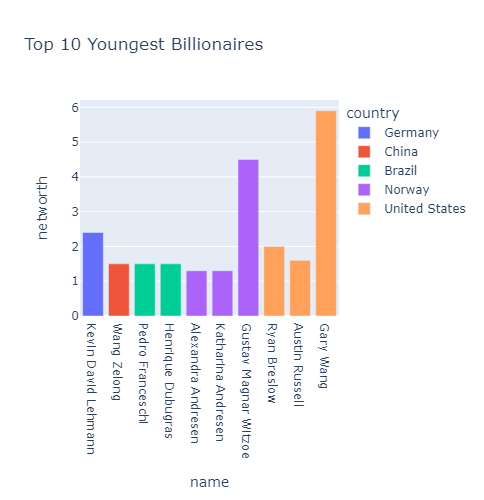

In [107]:
fig = px.bar(df_age1.head(10),x='name',y='networth',color='country',
                   title='Top 10 Youngest Billionaires',height=500,
                  hover_data=['name','age'])
fig.show()

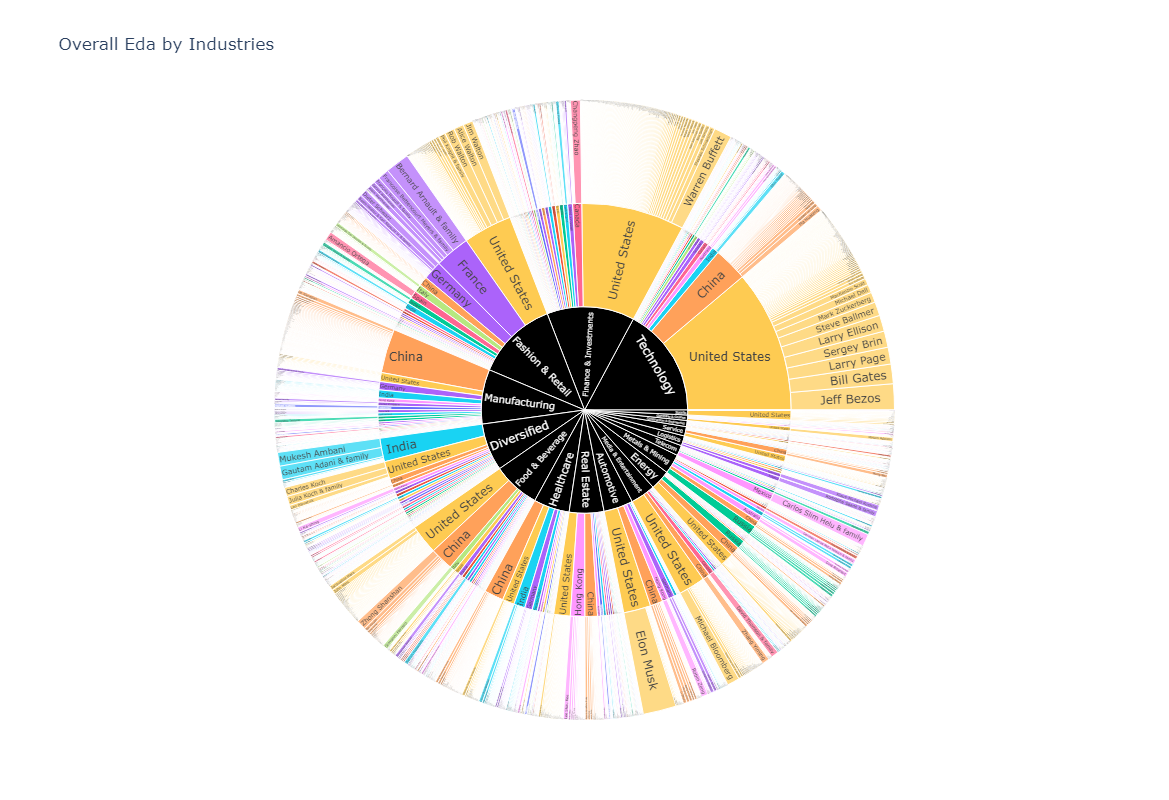

In [103]:
fig = px.sunburst(df,path=['industry','country','name'],
                  values='networth',color='country',
                  title = 'Overall Eda by Industries',
                 color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'},width=800,height=800)
fig.show()